In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Reading & Understanding the DATA

In [3]:
df = pd.read_csv("day.csv")
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
df.shape

(730, 16)

In [5]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# drop index
df.drop(["instant"], axis=1, inplace=True)

In [8]:
#num_cols = df.dtypes[(df.dtypes == "int64") | (df.dtypes == "float64")]
#cat_cols = df.dtypes[df.dtypes == "object"]

In [9]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [10]:
num_cols = [ 'temp', 'atemp', 'hum', 'windspeed']
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']

## EDA

### Numeric features

'temp' & 'atemp' show a strong linear relationaship with target variable 'cnt'

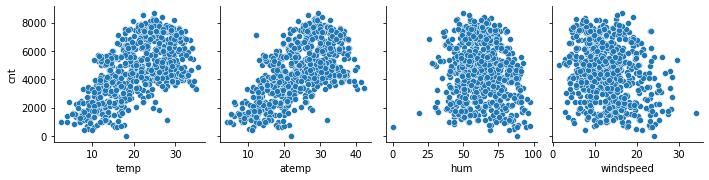

In [11]:
sns.pairplot(data=df, y_vars=["cnt"], x_vars=num_cols)
plt.show()

### Categorical features

- ‘season’ is a strong driver variable 
    – maximum bikes are rented in the season 3(fall), followed by 2(summer), 4(winter), 1(spring)
- ‘weathersit’ is a strong driver variable 
    – more bikes are rented in weathersit 1(Clear, Few clouds, Partly cloudy, Partly cloudy), followed by 2(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) and 3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
- People rented more bikes on an average in the year 1(2019) than year 0(2018)
- People rented more bikes on the months 7,9,6,8 than the other months
- People rented more bikes on non-holidays than holidays
- ‘weekday’ has little to no effect on the target variable (eliminated by RFE)
- ‘workingday’ has little to no effect on the target variable (eliminated by RFE)

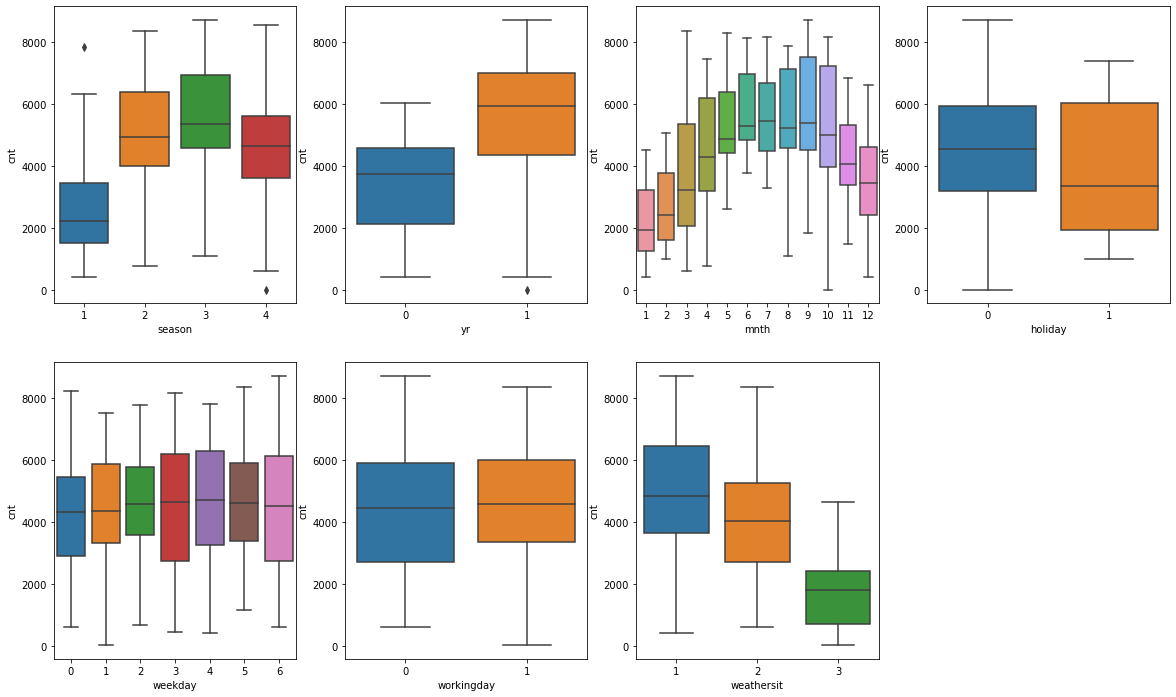

In [12]:
plt.figure(figsize=(20, 12))

for i in range(0,len(cat_cols)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x = cat_cols[i], y = 'cnt', data = df)
plt.show()

## Data preparation

In [13]:
df.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018       1   0     1        0        6           0           2   
1  02-01-2018       1   0     1        0        0           0           2   
2  03-01-2018       1   0     1        0        1           1           1   
3  04-01-2018       1   0     1        0        2           1           1   
4  05-01-2018       1   0     1        0        3           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

#### Categorical variables

##### Date is a categorical variable here, we can extract date info like dayoftheMonth and then delete the feature

In [14]:
df.drop(["dteday"], axis=1, inplace=True)
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

#### Dummy variables

weathersit & season

In [15]:
df_dummies = pd.get_dummies(df["season"], drop_first=True, prefix="season")
df = pd.concat([df, df_dummies], axis=1)

df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  season_2  season_3  \
0  18.18125  80.5833  10.749882     331         654   985         0         0   
1  17.68695  69.6087  16.652113     131         670   801         0         0   
2   9.47025  43.7273  16.636703     120        1229  1349         0         0   
3  10.60610  59.0435  10.739832     108        1454  1562         0         0   
4  11.46350  43.6957  12.522300      82        1518  1600         0         0   

   season_4  
0         0  
1         0  
2         0  
3         0  
4         0

In [16]:
df_dummies = pd.get_dummies(df["weathersit"], drop_first=True, prefix="weathersit")
df = pd.concat([df, df_dummies], axis=1)

df.drop(["season", "weathersit"], axis=1, inplace=True)
df.head()

yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed  casual  registered   cnt  season_2  season_3  season_4  \
0  10.749882     331         654   985         0         0         0   
1  16.652113     131         670   801         0         0         0   
2  16.636703     120        1229  1349         0         0         0   
3  10.739832     108        1454  1562         0         0         0   
4  12.522300      82        1518  1600         0         0         0   

   weathersit_2  weathersit_3  
0             1             0  
1             1             0  
2             0             0  
3             0             0  
4             0             0

Not creating dummy variables as of now for 'mnth' & 'weekday' since they are ordered categorical variables

#### New metrics are derived if applicable and are used for analysis and modelling.

In [17]:
# derive date metrics

In [18]:
# also, do we need casual and registered features? 
# these are also demands that needs to be predicted

df.drop(["casual", "registered"], axis=1, inplace=True)
df.head()

yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt  season_2  season_3  season_4  weathersit_2  weathersit_3  
0  10.749882   985         0         0         0             1             0  
1  16.652113   801         0         0         0             1             0  
2  16.636703  1349         0         0         0             0             0  
3  10.739832  1562         0         0         0             0             0  
4  12.522300  1600         0         0         0             0             0

## Data split - train and test sets

In [19]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
print(df_train.shape)
print(df_test.shape)

(510, 15)
(219, 15)


#### Scale the numeric features

In [21]:
scaler = MinMaxScaler()

df_train[num_cols+['cnt']] = scaler.fit_transform(df_train[num_cols+['cnt']])

In [22]:
df_train[num_cols+ ['cnt']].describe()

temp       atemp         hum   windspeed         cnt
count  510.000000  510.000000  510.000000  510.000000  510.000000
mean     0.537262    0.512989    0.650369    0.320768    0.513620
std      0.225844    0.212385    0.145882    0.169797    0.224593
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.339853    0.332086    0.538643    0.199179    0.356420
50%      0.540519    0.526811    0.653714    0.296763    0.518638
75%      0.735215    0.688457    0.754830    0.414447    0.684710
max      1.000000    1.000000    1.000000    1.000000    1.000000

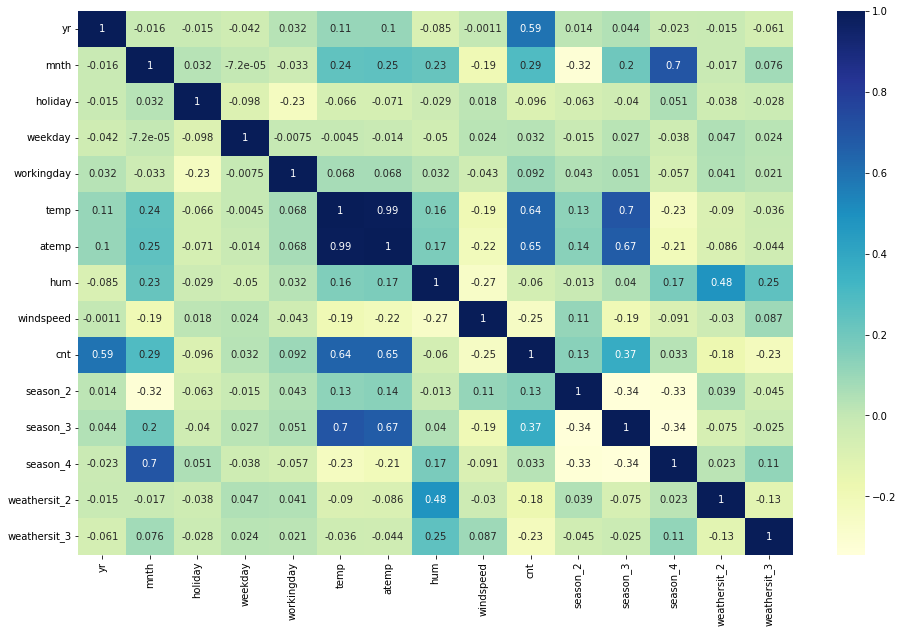

In [23]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- 'yr', 'temp', 'atemp' show strong positive correlation
- 'windspeed', 'weathersit_2', 'weathersit_3' show relatively strong negative correlation

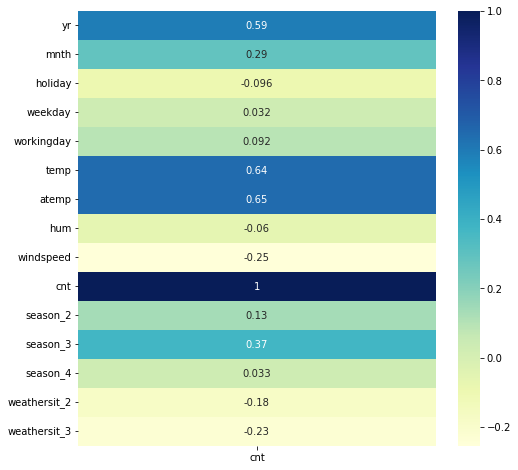

In [24]:
plt.figure(figsize = (8, 8))
sns.heatmap(df_train.corr()[['cnt']], annot = True, cmap="YlGnBu")
plt.show()

In [25]:
y_train = df_train.pop('cnt')
X_train = df_train

## RFE with Linear Model

In [26]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
rfe = RFE(lm,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 5),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

### Top 10 features selected by RFE

In [30]:
selected_col = X_train.columns[rfe.support_]
print(selected_col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'weathersit_2', 'weathersit_3'],
      dtype='object')


#### Features rejected by RFE

In [31]:
X_train.columns[~rfe.support_]

Index(['mnth', 'weekday', 'workingday', 'atemp'], dtype='object')

#### Model Building, with features eliminated by combination of pvalue & VIF

In [32]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[selected_col]

In [33]:
# Adding a constant variable 
import statsmodels.api as sm 
 
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          4.78e-183
Time:                        21:30:05   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2178      0.028      7.788      0.000       0.163       0.273
yr               0.2307      0.008     27.186      0.000       0.214       0.247
holiday         -0.0865      0.027     -3.245      0.001      -0.139      -0.034
temp             0.4961      0.035     14.324      0.000       0.428       0.564
hum             -0.1390      0.039     -3.548      0.000      -0.216      -0.062
windspeed       -0.1827      0.027     -6.794      0.000      -0.236      -0.130
season_2         0.1168      0.015      7.554      0.000       0.086       0.147
season_3         0.0746      0.021      3.597      0.000       0.034       0.115
season_4         0.1630      0.013     12.350      0.000       0.137       0.189
weathersit_2    -0.0537      0.011     -4.889      0.000      -0.075      -0.032
weathersit_3    -0.2409      0.028     -8.751      0.000      -0.295      -0.187
==============================================================================
Omnibus:                       64.105   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.041
Skew:                          -0.644   Prob(JB):                     1.07e-35
Kurtosis:                       5.433   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the variables have a small p-value and hence are all significant

In [34]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2          temp  22.67
3           hum  15.02
6      season_3   6.48
4     windspeed   3.63
5      season_2   3.36
7      season_4   2.48
8  weathersit_2   2.13
0            yr   2.02
9  weathersit_3   1.17
1       holiday   1.04

temp has a very high VIF, lets drop that first, and Repeat RFE & VIF

In [35]:
X_train_new = X_train_rfe.drop(['temp'], axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     172.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          5.21e-147
Time:                        21:30:05   Log-Likelihood:                 398.32
No. Observations:                 510   AIC:                            -776.6
Df Residuals:                     500   BIC:                            -734.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2869      0.033      8.773      0.000       0.223       0.351
yr               0.2468      0.010     24.730      0.000       0.227       0.266
holiday         -0.0930      0.032     -2.939      0.003      -0.155      -0.031
hum             -0.0045      0.045     -0.101      0.920      -0.093       0.084
windspeed       -0.1765      0.032     -5.530      0.000      -0.239      -0.114
season_2         0.2545      0.014     17.718      0.000       0.226       0.283
season_3         0.3142      0.015     21.553      0.000       0.286       0.343
season_4         0.2273      0.015     15.432      0.000       0.198       0.256
weathersit_2    -0.0864      0.013     -6.777      0.000      -0.111      -0.061
weathersit_3    -0.2901      0.032     -8.949      0.000      -0.354      -0.226
==============================================================================
Omnibus:                       26.430   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.651
Skew:                          -0.291   Prob(JB):                     1.36e-12
Kurtosis:                       4.495   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           hum  9.36
3     windspeed  3.55
5      season_3  2.21
6      season_4  2.18
4      season_2  2.03
0            yr  1.97
7  weathersit_2  1.96
8  weathersit_3  1.13
1       holiday  1.04

pvalue & VIF of hum are still high, lets eliminate that

In [37]:
X_train_new = X_train_rfe.drop(['hum', 'temp'], axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     194.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          3.64e-148
Time:                        21:30:05   Log-Likelihood:                 398.32
No. Observations:                 510   AIC:                            -778.6
Df Residuals:                     501   BIC:                            -740.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2840      0.016     17.254      0.000       0.252       0.316
yr               0.2469      0.010     24.845      0.000       0.227       0.266
holiday         -0.0930      0.032     -2.943      0.003      -0.155      -0.031
windspeed       -0.1755      0.030     -5.769      0.000      -0.235      -0.116
season_2         0.2543      0.014     17.875      0.000       0.226       0.282
season_3         0.3140      0.014     21.816      0.000       0.286       0.342
season_4         0.2270      0.014     15.738      0.000       0.199       0.255
weathersit_2    -0.0871      0.011     -8.248      0.000      -0.108      -0.066
weathersit_3    -0.2914      0.030     -9.719      0.000      -0.350      -0.232
==============================================================================
Omnibus:                       26.455   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.678
Skew:                          -0.291   Prob(JB):                     1.34e-12
Kurtosis:                       4.495   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All features have low pvalue

In [38]:
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2     windspeed  2.59
0            yr  1.88
3      season_2  1.61
5      season_4  1.50
4      season_3  1.45
6  weathersit_2  1.45
7  weathersit_3  1.08
1       holiday  1.03

All features have low VIF

#### Residual analysis

In [39]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     194.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          3.64e-148
Time:                        21:30:05   Log-Likelihood:                 398.32
No. Observations:                 510   AIC:                            -778.6
Df Residuals:                     501   BIC:                            -740.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2840      0.016     17.254      0.000       0.252       0.316
yr               0.2469      0.010     24.845      0.000       0.227       0.266
holiday         -0.0930      0.032     -2.943      0.003      -0.155      -0.031
windspeed       -0.1755      0.030     -5.769      0.000      -0.235      -0.116
season_2         0.2543      0.014     17.875      0.000       0.226       0.282
season_3         0.3140      0.014     21.816      0.000       0.286       0.342
season_4         0.2270      0.014     15.738      0.000       0.199       0.255
weathersit_2    -0.0871      0.011     -8.248      0.000      -0.108      -0.066
weathersit_3    -0.2914      0.030     -9.719      0.000      -0.350      -0.232
==============================================================================
Omnibus:                       26.455   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.678
Skew:                          -0.291   Prob(JB):                     1.34e-12
Kurtosis:                       4.495   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
y_pred = lm.predict(X_train_lm)

Errors follow a normal distribution, validating the corresponding assumption of the linear model

Text(0.5, 0, 'Errors')

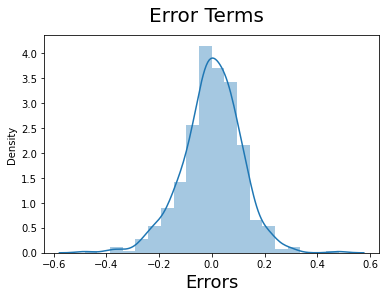

In [41]:
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)                         

Error terms are independent of each other

Text(0, 0.5, 'error')

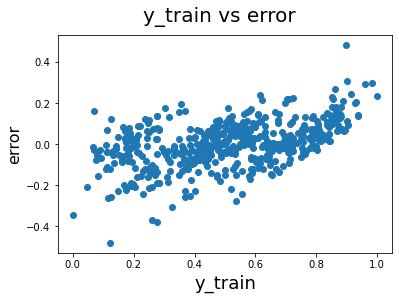

In [42]:
y_pred = lm.predict(X_train_lm)
error = y_train - y_pred

# Plotting y_train and error
fig = plt.figure()
plt.scatter(y_train,error)
fig.suptitle('y_train vs error', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('error', fontsize=16)

### Predictions

#### Scaling test features

In [43]:
df_test[num_cols+['cnt']] = scaler.transform(df_test[num_cols+['cnt']])

y_test = df_test.pop('cnt')
X_test = df_test

In [44]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

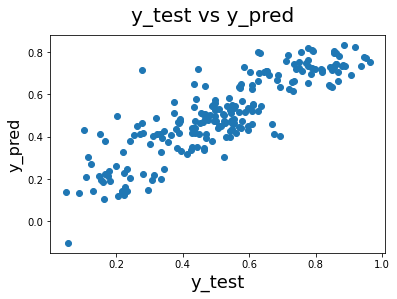

In [45]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

#### R2

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7367319609687298

R2 of train and test datasets are very similar. This confirms that the model has not over or underfitted.

#### Adjusted R2

In [47]:
lm.rsquared_adj

0.7522096656818742

## Sklearn model, with same featueres

In [48]:
sklearn_lm = LinearRegression()
sklearn_lm.fit(X_train_new, y_train)

LinearRegression()

In [49]:
X_test_new = X_test[X_train_new.columns]
y_pred = sklearn_lm.predict(X_test_new)

In [50]:
r2_score(y_test, y_pred)

0.7367319609687297

## Interpretatin & Final equation

In [51]:
lm.params

const           0.284014
yr              0.246923
holiday        -0.093006
windspeed      -0.175512
season_2        0.254327
season_3        0.313966
season_4        0.226967
weathersit_2   -0.087140
weathersit_3   -0.291361
dtype: float64

### Final Equation:

y = 0.2182 + (0.2461)*'yr' + (-0.09595)*'holiday' + (-0.1755)*'windspeed'  + (0.2579)*'season_2' + (0.3334)*'season_3' + (0.242)*'season_4' + (-0.0851)*weathersit_2 + (-0.3089)*weathersit_3

### Interpretation:

- For a unit increase in season_3, i.e, if season_3 is 1, 'cnt' or y increases by 0.3334 units, provided other variables remain constant
- Similarly, for a unit increase in weathersit_3, 'cnt' decreases by 0.3089 units
- for a unit increase in season_2, 'cnt' increases by 0.2579 units